<a href="https://colab.research.google.com/github/jordantangy/MoviePosterClassification-CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow==2.0.0-rc0

     |████████████████████████████████| 86.3MB 81kB/s 
     |████████████████████████████████| 4.3MB 58.8MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 501kB 59.5MB/s 
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

##**Import dataset and show its content**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/duplicate_free_41K.csv')
truncat = data[:30000]
truncat

,id,poster,title,year,rating,genre,action,adventure,animation,comedy,crime,drama,fantasy,horror,mystery,romance,sci-fi,short,thriller
0,0,https://m.media-amazon.com/images/M/MV5BNDM0ND...,Construction,2021,7.4,"comedy, romance",0,0,0,1,0,0,0,0,0,1,0,0,0
1,1,https://m.media-amazon.com/images/M/MV5BNTgyZD...,RED,2020,10.0,horror,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,https://m.media-amazon.com/images/M/MV5BNGQzMT...,Huldra and Photographer,2020,10.0,"short, fantasy, horror",0,0,0,0,0,0,1,1,0,0,0,1,0
3,3,https://m.media-amazon.com/images/M/MV5BMWE2Yz...,Anti-dirt,2020,10.0,"short, action, comedy",1,0,0,1,0,0,0,0,0,0,0,1,0
4,4,https://m.media-amazon.com/images/M/MV5BOGI0Nz...,Asalu Em Jarigindhante,2020,10.0,drama,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,30023,https://m.media-amazon.com/images/M/MV5BMTU1Nj...,A Mother's Nightmare,2012,6.0,"crime, mystery, thriller",0,0,0,0,1,0,0,0,1,0,0,0,1
29996,30024,https://m.media-amazon.com/images/M/MV5BMTQ3Mz...,SheZow,2012,6.0,"animation, action, adventure",1,1,1,0,0,0,0,0,0,0,0,0,0
29997,30025,https://m.media-amazon.com/images/M/MV5BNDNkN2...,The Seven Year Hitch,2012,6.0,"comedy, romance",0,0,0,1,0,0,0,0,0,1,0,0,0
29998,30026,https://m.media-amazon.com/images/M/MV5BNjg5ZD...,Onii-chan Dakedo Ai Sae Areba Kankei Nai yo ne-,2012,6.0,animation,0,0,1,0,0,0,0,0,0,0,0,0,0


In [4]:
!unzip /content/drive/MyDrive/img_41K.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: img_41K/5496.jpg        
  inflating: img_41K/5497.jpg        
  inflating: img_41K/5498.jpg        
  inflating: img_41K/5499.jpg        
  inflating: img_41K/55.jpg          
  inflating: img_41K/550.jpg         
  inflating: img_41K/5500.jpg        
  inflating: img_41K/5501.jpg        
  inflating: img_41K/5502.jpg        
  inflating: img_41K/5503.jpg        
  inflating: img_41K/5504.jpg        
  inflating: img_41K/5505.jpg        
  inflating: img_41K/5506.jpg        
  inflating: img_41K/5507.jpg        
  inflating: img_41K/5508.jpg        
  inflating: img_41K/5509.jpg        
  inflating: img_41K/551.jpg         
  inflating: img_41K/5510.jpg        
  inflating: img_41K/5511.jpg        
  inflating: img_41K/5512.jpg        
  inflating: img_41K/5513.jpg        
  inflating: img_41K/5514.jpg        
  inflating: img_41K/5515.jpg        
  inflating: img_41K/5516.jpg        
  inflatin

##**Insertion of the pictures into a managable array**

In [5]:
pic_width = 224
pic_height = 224
X = []
for i in tqdm(range(int(truncat.shape[0]))):
  path = '/content/img_41K/'+ str(data['id'][i]) +'.jpg'
  img = image.load_img(path, target_size=(pic_width,pic_height,3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

100%|██████████| 30000/30000 [01:35<00:00, 315.22it/s]


##**Example of a poster from the DataSet and its corresponding genre**

In [6]:
X = np.array(X)

'comedy'

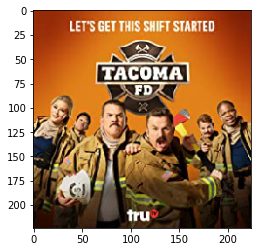

In [7]:
plt.imshow(X[2419])
data['genre'][2419]

In [8]:
#matrix y comes from the csv file, we just drop the column id and genre.
#So we have a matrix representing which genre each movie belongs to

y = truncat.drop(['id','poster','title','year','rating','genre'], axis = 1)
y = y.to_numpy()

##**Splitting the dataset into train set and test set**

In [9]:
train_size = int(X.shape[0]*0.80)
test_size = int(X.shape[0]*0.20)
X_train = X[:train_size]
X_test = X[:test_size]
y_train = y[:train_size]
y_test = y[:test_size]


##**Building the CNN Model**

In [51]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.1))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))


model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())



model.add(Dense(13, activation='sigmoid'))

##**Compilation**

In [52]:
model.compile(optimizer="adam", loss = 'binary_crossentropy', metrics=['accuracy'])

##**Start training**

In [53]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks = [callback])

Train on 24000 samples, validate on 6000 samples
Epoch 1/20
24000/24000 [==============================] - 276s 11ms/sample - loss: 0.4503 - accuracy: 0.8034 - val_loss: 0.3910 - val_accuracy: 0.8397
Epoch 2/20
24000/24000 [==============================] - 281s 12ms/sample - loss: 0.3962 - accuracy: 0.8354 - val_loss: 0.3874 - val_accuracy: 0.8431
Epoch 3/20
24000/24000 [==============================] - 288s 12ms/sample - loss: 0.3862 - accuracy: 0.8386 - val_loss: 0.3853 - val_accuracy: 0.8432
Epoch 4/20
24000/24000 [==============================] - 297s 12ms/sample - loss: 0.3742 - accuracy: 0.8430 - val_loss: 0.3573 - val_accuracy: 0.8526
Epoch 5/20
24000/24000 [==============================] - 288s 12ms/sample - loss: 0.3591 - accuracy: 0.8485 - val_loss: 0.3364 - val_accuracy: 0.8604
Epoch 6/20
24000/24000 [==============================] - 288s 12ms/sample - loss: 0.3360 - accuracy: 0.8575 - val_loss: 0.2987 - val_accuracy: 0.8729
Epoch 7/20
24000/24000 [=====================

In [58]:
len(history.history['loss']) 

20

##**Plot the values obtained during the training session**

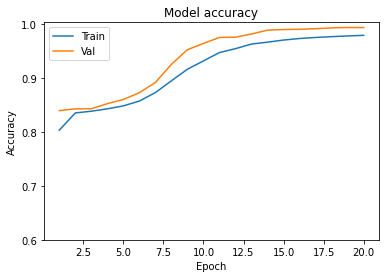

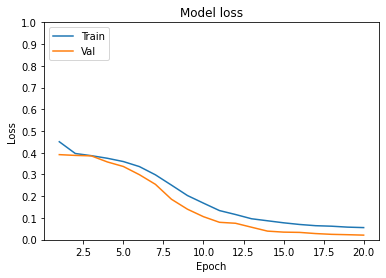

In [97]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.yticks([0.6,0.7,0.8,0.9,1,])
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 20)

##**A few examples of testing**

The 2 genres predicted for the Movie "Poltergeist" are :
horror
thriller
The expected output was at least 'horror', hence the network succeeded


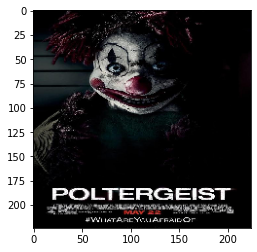

In [56]:
img = image.load_img('/content/poltergeist-feature-poster.jpg', target_size=(pic_width,pic_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, pic_width, pic_height, 3)

genres = data.columns[6:]
y_prob = model.predict(img)
arr = np.array(y_prob)
top3 = np.argsort(y_prob[0])
print('The 2 genres predicted for the Movie "Poltergeist" are :')
for i in range(11,13):
  print(genres[top3][i])
print("The expected output was at least 'horror', hence the network succeeded")

The 2 genres predicted for the Movie "War" are :
thriller
action
The expected output was at least 'action', hence the network succeeded


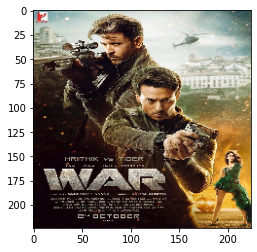

In [100]:
img = image.load_img('/content/action_poster.jpg', target_size=(pic_width,pic_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, pic_width, pic_height, 3)

genres = data.columns[6:]
y_prob = model.predict(img)
arr = np.array(y_prob)
top3 = np.argsort(y_prob[0])
print('The 2 genres predicted for the Movie "War" are :')
for i in range(11,13):
  print(genres[top3][i])
print("The expected output was at least 'action', hence the network succeeded")

The 2 genres predicted for the Movie "Love, Romance and Chocolate" are :
drama
romance
The expected output was at least 'romance', hence the network succeeded


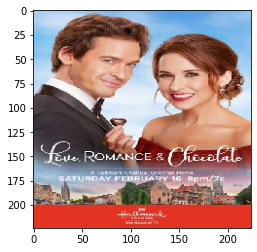

In [101]:
img = image.load_img('/content/love-romance-chocolate-movie-poster-md.jpg', target_size=(pic_width,pic_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, pic_width, pic_height, 3)

genres = data.columns[6:]
y_prob = model.predict(img)
arr = np.array(y_prob)
top3 = np.argsort(y_prob[0])
print('The 2 genres predicted for the Movie "Love, Romance and Chocolate" are :')
for i in range(11,13):
  print(genres[top3][i])
print("The expected output was at least 'romance', hence the network succeeded")

The 2 genres predicted for the Movie "Avatar" are :
thriller
horror
The expected output was at least 'sci-fi', but it doesn't appear, hence the network didn't succeed to predict the right genre


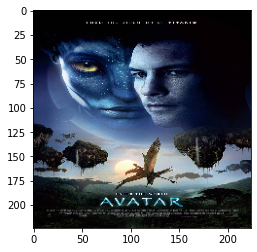

In [102]:
img = image.load_img('/content/sci-fi-fantasy_0017_ebay_listing.jpg', target_size=(pic_width,pic_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1, pic_width, pic_height, 3)

genres = data.columns[6:]
y_prob = model.predict(img)
arr = np.array(y_prob)
top3 = np.argsort(y_prob[0])
print('The 2 genres predicted for the Movie "Avatar" are :')
for i in range(11,13):
  print(genres[top3][i])
print("The expected output was at least 'sci-fi', but it doesn't appear, hence the network didn't succeed to predict the right genre")